# Get effective areas/volumes

### May 7, 2021

## Code

In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
%matplotlib inline
# sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/SourceSearch")
# import deDisperse_util as util
import matplotlib.colors as colors

my_path_plots = os.path.abspath("./plots/")
import re


In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")


# Get data

In [3]:
colName=["Energy", "Aeff", "Err", "Nthrown", "Npassed", "weight_thrown", "Veff","Err_Veff"]

folder = "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_SourceSearch/sim_util/veff/veffs/"
veffs = pd.read_csv(folder+"Veff_source_Search.txt", names=colName)

In [4]:
veffs=veffs.sort_values(by='Energy')
veffs=veffs.reset_index()
veffs = veffs.drop("index",axis=1)
veffs


,Energy,Aeff,Err,Nthrown,Npassed,weight_thrown,Veff,Err_Veff
0,1.000000e+16,3.906901e+03,1.443047e+02,24040000,732.9002,24180460.0,0.002586,0.000096
1,3.162278e+16,5.891815e+04,8.226032e+02,24040000,5129.1600,24265360.0,0.024633,0.000344
2,1.000000e+17,4.492323e+05,3.224303e+03,24040000,19406.3500,24201290.0,0.121731,0.000874
3,3.162278e+17,1.929686e+06,9.737941e+03,24040000,39247.7600,24289020.0,0.347167,0.001752
4,1.000000e+18,6.408768e+06,7.061817e+04,3010000,8228.4110,3047736.0,0.779374,0.008588
5,3.162278e+18,1.906629e+07,1.667804e+05,3010000,13048.2200,3025904.0,1.595937,0.013960
6,1.000000e+19,5.103732e+07,3.654204e+05,3010000,19456.4000,3055771.0,2.985129,0.021373
7,3.162278e+19,1.204967e+08,7.621498e+05,3010000,24893.0000,3045319.0,4.988406,0.031552
8,1.000000e+20,2.544412e+08,1.471179e+06,3010000,29722.8700,3035932.0,7.538420,0.043587
9,3.162278e+20,5.000642e+08,2.825052e+06,3010000,31037.2800,3036900.0,10.714380,0.060530


In [5]:
IceCube = pd.read_csv("dataForVeff/IceCube_avg_Dec-30-90.txt")
IceCube.veff = IceCube.veff*1E6
IceCube.tail()


,energy,veff
15,1.220000e+17,680.0
16,1.900000e+17,809.0
17,2.940000e+17,978.0
18,4.490000e+17,1170.0
19,6.170000e+17,1260.0


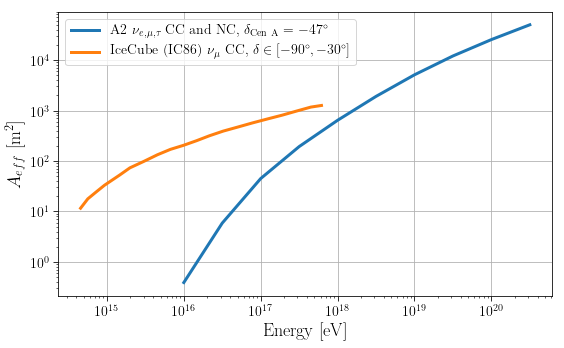

In [6]:
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

plt.figure(figsize=(8,5))
plt.loglog(veffs["Energy"], (veffs["Aeff"]/1E4), label=r"A2 $\nu_{e,\mu,\tau}$ CC and NC, $\delta_{\text{Cen A}}=-47^\circ$", lw = 3)
plt.loglog(IceCube.energy, IceCube.veff, label="IceCube (IC86) $\\nu_\mu$ CC, $\delta\in [-90^\circ, -30^\circ]$", lw = 3)


plt.fill_between(veffs["Energy"],veffs["Aeff"]/1E4-veffs["Err"]/1E4,veffs["Aeff"]/1E4+veffs["Err"]/1E4, alpha=0.5)

plt.xlabel("Energy [eV]")
plt.ylabel("$A_{eff}$ [m$^2$]")
plt.grid()
plt.legend(fontsize = 14)
plt.tight_layout()
# plt.savefig("./Veff_A2_CenA_IceCube.pdf")

### Digitize flux from 1906.07419

In [5]:
energy = np.array([3.87e+14,5.00e+14,6.47e+14,8.56e+14,1.16e+15,1.57e+15,2.28e+15,3.32e+15,4.81e+15,6.99e+15,1.01e+16,1.47e+16,2.14e+16,3.11e+16,4.51e+16,6.55e+16,9.53e+16,1.38e+17,2.00e+17,2.91e+17,4.22e+17,5.78e+17,8.15e+17,1.09e+18,1.52e+18,2.00e+18,2.40e+18,])
flux = np.array([3.36e-10,4.61e-10,6.19e-10,8.26e-10,1.07e-9,1.45e-9,1.90e-9,2.42e-9,2.88e-9,3.35e-9,3.77e-9,4.27e-9,4.60e-9,4.64e-9,4.36e-9,3.98e-9,3.53e-9,3.03e-9,2.54e-9,1.98e-9,1.49e-9,1.14e-9,9.10e-10,6.80e-10,4.88e-10,3.63e-10,3.05e-10])

In [6]:
energy_Auger = np.array([4.51e+16,6.44e+16,9.53e+16,1.39e+17,2.00e+17,2.92e+17,4.22e+17,6.04e+17,8.54e+17,1.18e+18,1.60e+18,2.12e+18,2.39e+18,])


In [7]:
limit_Auger = np.array([4.21e-7,3.84e-7,3.39e-7,2.91e-7,2.45e-7,1.91e-7,1.44e-7,1.10e-7,8.35e-8,6.09e-8,4.52e-8,3.42e-8,2.84e-8,])

Text(0,0.5,'$E^2 dN/dE$ [GeV cm$^{-2}$ s$^{-1}$]')

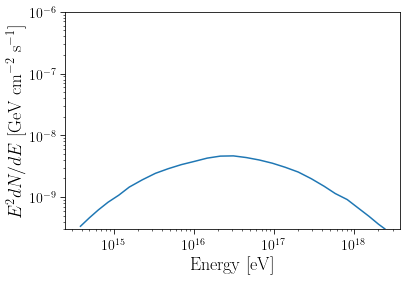

In [8]:
plt.loglog(energy,flux)
plt.ylim(3E-10,1E-6)
plt.xlabel("Energy [eV]")
plt.ylabel("$E^2 dN/dE$ [GeV cm$^{-2}$ s$^{-1}$]")

In [10]:
eff = np.array([0.19576185671039353,0.34823316218665057,0.4626036808942366,0.5148132573875148,0.5324132568762756,0.5570702480729746,0.5836126966869016,0.5895014000919463,0.5933887868639948,0.6096294076515832])
energyGev = veffs["Energy"]/1E9

In [11]:
def calculateLimit(energy, exposure_time, Aeff, efficiency, E2=False): #energy in GeV, exposure_time in years. Aeff in cm^2
    n = 2.44 #FC limit
    exposure = efficiency*Aeff*exposure_time*3600*24*365 #Converting time to seconds
    if(E2==False):
        limit = n/(exposure*np.log(10)*1)
    else:
        limit = energy*n/(exposure*np.log(10)*1)
    return limit

In [12]:
limit = calculateLimit(energyGev, 4, veffs["Aeff"], eff, True)
projectedLim = calculateLimit(energyGev, 2.5*100, veffs["Aeff"], eff, True)

# limitIC86 = calculateLimit(np.array(IceCube.energy)/1E9, 10, np.array(IceCube.veff)*1E4, 1, True)

In [13]:
def Nevents(Energy, flux, efficiency, Aeff, time):
    exposure = Aeff*time*3600*24*365
    fluxInterp = np.interp(Energy,energy/1E9,flux)
#     print(fluxInterp)
    return fluxInterp*exposure*efficiency*0.5*np.log(10)

In [14]:
Nevents(energyGev, flux, eff, veffs["Aeff"], 4)/energyGev

0    0.000042
1    0.000436
2    0.001049
3    0.000860
4    0.000374
5    0.000149
6    0.000132
7    0.000099
8    0.000067
9    0.000043
dtype: float64

In [15]:
sum(Nevents(energyGev, flux, eff, veffs["Aeff"], 4)[1:6]/energyGev[1:6])

0.0028683332851777705

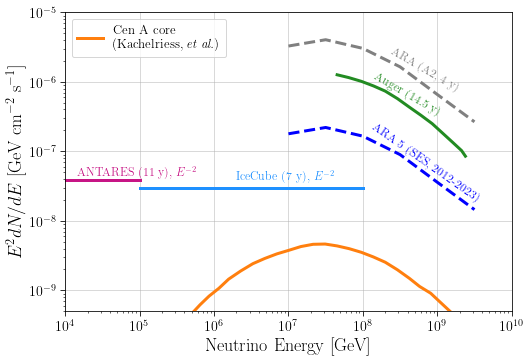

In [22]:
plt.figure(figsize=(8,5.5))

plt.loglog(energy/1E9,flux, lw = 3, c="C1", ls="-",label = "Cen A core \n (Kachelriess, \\textit{et al.})")
# plt.loglog(energyGev,limit, ls="-", lw = 3, color = "gray")
plt.loglog(energyGev[0:6],(2.44/0.0028)*np.interp(energyGev,energy/1E9,flux)[0:6], ls="--", lw = 3, color = "gray")
# plt.loglog(energyGev,projectedLim, ls="-", lw = 3, color = "blue")
# plt.loglog(energyGev,np.interp(energyGev,energy/1E9,flux)/(Nevents(energyGev, flux, eff, veffs["Aeff"], 4)/energyGev))
plt.loglog(energyGev[0:6],(1/0.0028)*np.interp(energyGev,energy/1E9,flux)[0:6]/(30/4), ls="--", lw = 3, color = "blue")


plt.loglog(energy_Auger/1E9,3*limit_Auger, ls="-",color="forestgreen", lw = 3, )
plt.loglog(np.logspace(5,8, num=6), 3*1E-8*np.ones(6),color="dodgerblue",  lw = 3)
plt.loglog(np.logspace(4,5, num=6), 3*1.3E-8*np.ones(6), color = "mediumvioletred", lw = 3)

##ANOTATE
plt.annotate('IceCube (7 y), $E^{-2}$',xy=(9e6, 3*1.3e-8), xycoords='data',horizontalalignment='center', color='dodgerblue', rotation=0, fontsize=12,fontweight="bold")
plt.annotate('ANTARES (11 y), $E^{-2}$',xy=(9e4, 3*1.5e-8), xycoords='data',horizontalalignment='center', color='mediumvioletred', rotation=0, fontsize=12,fontweight="bold")
plt.annotate('Auger (14.5 y)',xy=(4e8, 2*5.5e-7), xycoords='data',horizontalalignment='center', color='forestgreen', rotation=-30, fontsize=12,fontweight="bold")
plt.annotate('ARA (A2, 4 y)',xy=(7e8, 2.5e-6), xycoords='data',horizontalalignment='center', color='gray', rotation=-30, fontsize=12,fontweight="bold")
plt.annotate('ARA 5 (SES, 2012-2023)',xy=(7e8, 2e-7), xycoords='data',horizontalalignment='center', color='blue', rotation=-35, fontsize=12,fontweight="bold")


plt.grid(alpha = 0.6)
# plt.ylim(5E-10,2E-4)
plt.ylim(5E-10,1E-5)
plt.xlim(1E4,1E10)
plt.xlabel("Neutrino Energy [GeV]")
plt.ylabel("$E^2 dN/dE$ [GeV cm$^{-2}$ s$^{-1}$]")
plt.legend(loc="upper left", fontsize=13, fancybox="True")
plt.savefig("ARA_limit_CenA_E2_v2.pdf")

In [44]:
def Nevents(Energy, flux, efficiency, Aeff, time):
    exposure = Aeff*time*3600*24*365
    fluxInterp = np.interp(Energy,energy/1E9,flux)
#     print(fluxInterp)
    return fluxInterp*exposure*efficiency*0.5*np.log(10)

In [45]:
Nevents(energyGev, flux, eff, veffs["Aeff"], 4)/energyGev

0    0.000042
1    0.000436
2    0.001049
3    0.000860
4    0.000374
5    0.000149
6    0.000132
7    0.000099
8    0.000067
9    0.000043
dtype: float64

In [58]:
sum(Nevents(energyGev, flux, eff, veffs["Aeff"], 4)[1:6]/energyGev[1:6])

0.0028683332851777705

In [22]:
num1 = np.cos(np.radians(-20+13))-np.cos(np.radians(-20-13))
num1

0.15387558369589793

In [17]:
num2 = np.radians(33*2)
num2

1.1519173063162575

In [18]:
alpha = (num1*num2)/(4*np.pi)
alpha

0.0035943923075882097

In [21]:
np.log(0.0264)/-5.96

0.6097971927566891

In [20]:
(13*2*33*2)/(180*360)

0.02648148148148148